In [13]:
# Importing required libraries

import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam, AdamW
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
dataset = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Load the Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
# Splitting training data into training and validation

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [5]:
# Shape of datasets

print('Training dataset shape: ', x_train.shape, y_train.shape)
print('Validation dataset shape: ', x_val.shape, y_val.shape)
print('Testing dataset shape: ', x_test.shape, y_test.shape)

Training dataset shape:  (48000, 28, 28) (48000,)
Validation dataset shape:  (12000, 28, 28) (12000,)
Testing dataset shape:  (10000, 28, 28) (10000,)


In [ ]:
# Get unique target values
unique_values = np.unique(y_train)

print(unique_values)

[0 1 2 3 4 5 6 7 8 9]


Now that we know all the classes in the target variable we can take a look to the distributon in all the datasets (training, validation, testing) and in the overall total

In [ ]:
# Generating a dataframe with the counts per class

tr_value, tr_count = np.unique(y_train, return_counts=True)
val_value, val_count = np.unique(y_val, return_counts=True)
test_value, test_count = np.unique(y_test, return_counts=True)

count_df= pd.DataFrame({'Class': tr_value, 'Training_values':tr_count, 'Validation_values': val_count, 'Testing_values': test_count})
count_df['Total'] = count_df['Training_values'] + count_df['Validation_values'] + count_df['Testing_values']
count_df

,Class,Training_values,Validation_values,Testing_values,Total
0,0,4798,1202,1000,7000
1,1,4781,1219,1000,7000
2,2,4795,1205,1000,7000
3,3,4816,1184,1000,7000
4,4,4798,1202,1000,7000
5,5,4789,1211,1000,7000
6,6,4782,1218,1000,7000
7,7,4841,1159,1000,7000
8,8,4803,1197,1000,7000
9,9,4797,1203,1000,7000


We can see that the classes are balanced in all the datasets, which is good for the training process.

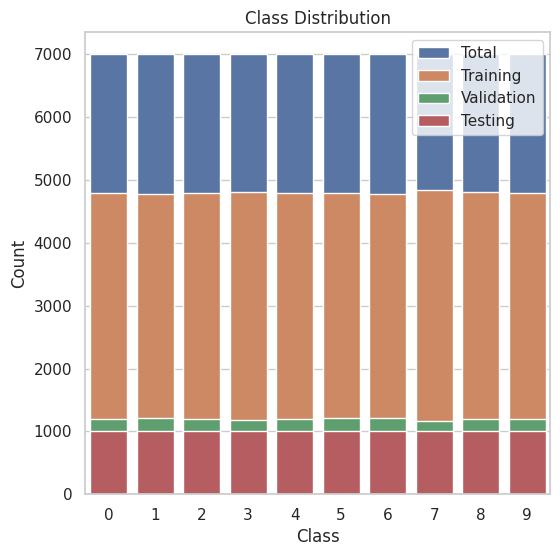

In [ ]:
plt.figure(figsize=(6, 6))
sns.set(style='whitegrid')
sns.barplot(x='Class', y='Total', data=count_df, label='Total')
sns.barplot(x='Class', y='Training_values', data=count_df, label='Training')
sns.barplot(x='Class', y='Validation_values', data=count_df, label='Validation')
sns.barplot(x='Class', y='Testing_values', data=count_df, label='Testing')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Now we can take a look to some samples of the training dataset, finding different kinds of clothes.

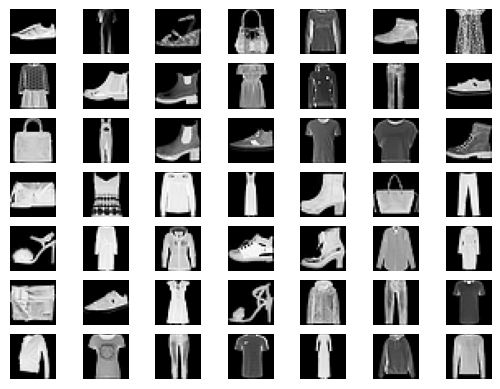

In [ ]:
# Looking for some images in the dataset

fig, axes = plt.subplots(7,7)

for i in range(7):
    for j in range(7):
        axes[i,j].imshow(x_train[i*7+j], cmap='gray')
        axes[i, j].axis('off')

plt.show()

## Data preprocessing

To improve model performance, is better that the pixel values have a range betweeen 0 and 1. For this purpose scaling is applied.

In [6]:
# Data scaling

x_train = x_train /250.0
x_val = x_val /250.0
x_test = x_test /250.0

## Models

### First model

In [35]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         692,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,578 (2.65 MB)

 Trainable params: 693,578 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = ['accuracy']
batch_size = 32
epochs = 10

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

history=model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.9355 - loss: 0.1778 - val_accuracy: 0.9103 - val_loss: 0.2533
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9467 - loss: 0.1472 - val_accuracy: 0.9114 - val_loss: 0.2590
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9549 - loss: 0.1280 - val_accuracy: 0.9134 - val_loss: 0.2534
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9624 - loss: 0.1073 - val_accuracy: 0.9132 - val_loss: 0.2746
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9662 - loss: 0.0964 - val_accuracy: 0.9108 - val_loss: 0.2969
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9733 - loss: 0.0762 - val_accuracy: 0.9094 - val_loss: 0.3136
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9761 - loss: 0.0656 - val_accuracy: 0.9110 - val_loss: 0.3396
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.9786 -

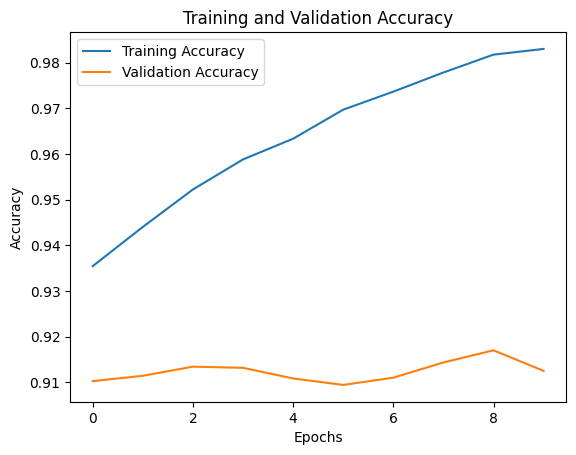

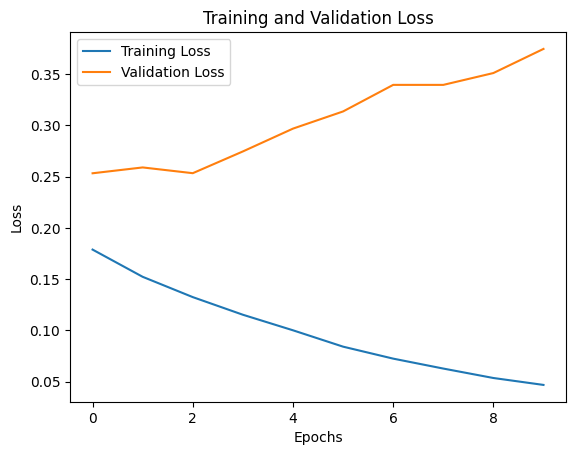

In [47]:

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()



plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

We can see that there is an overfitting happening in the model.

### Model 2

To deal with the overfitting the second approach is to implement early stopping and dropout. Also the optimazier is now AdamW and there is an additional convolutional layer.

In [39]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))

In [40]:
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
optimizer = 'adamW'
loss = 'sparse_categorical_crossentropy'
metrics = ['accuracy']
batch_size = 32
epochs = 10

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, mode=min)

model2.compile(optimizer=optimizer, loss=loss, metrics=metrics)

history2=model2.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping])

<ipython-input-41-83f92d3ce215>:7: UserWarning: EarlyStopping mode <built-in function min> is unknown, fallback to auto mode.
  early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, mode=min)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.7128 - loss: 0.8010 - val_accuracy: 0.8606 - val_loss: 0.3697
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.8574 - loss: 0.3937 - val_accuracy: 0.8741 - val_loss: 0.3383
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.8737 - loss: 0.3422 - val_accuracy: 0.8926 - val_loss: 0.2987
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.8906 - loss: 0.2983 - val_accuracy: 0.8964 - val_loss: 0.2773
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.8951 - loss: 0.2791 - val_accuracy: 0.9018 - val_loss: 0.2669
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9064 - loss: 0.2556 - val_accuracy: 0.9051 - val_loss: 0.2573
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9113 - loss: 0.2379 - val_accuracy: 0.9034 - val_loss: 0.2608
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9150 -

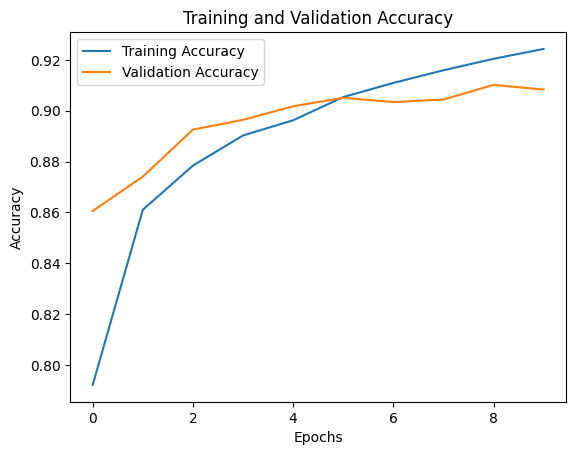

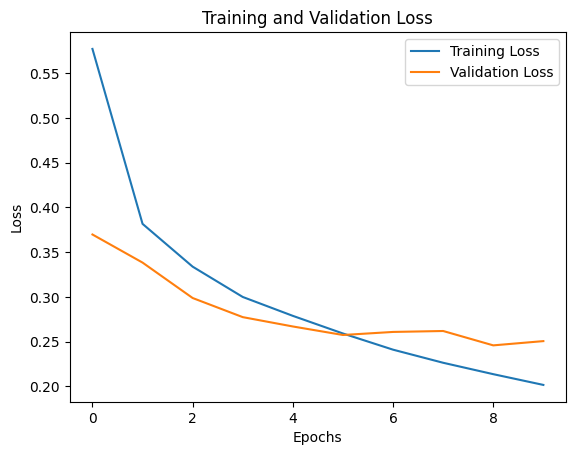

In [43]:

training_accuracy = history2.history['accuracy']
validation_accuracy = history2.history['val_accuracy']
training_loss = history2.history['loss']
validation_loss = history2.history['val_loss']

plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()



plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

We can see that there is less overfitting happening in this second model.

## Test dataset evaluation

No we can evaluate both models, here there is the result for the first model.

In [48]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9095 - loss: 0.3826


[0.3733474910259247, 0.9117000102996826]

Now we evaluate the second model, obtaining the following results.

In [45]:
model2.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9084 - loss: 0.2605


[0.2591772973537445, 0.90829998254776]

We see that the valdation is pretty similar in both models, with a difference in the loss that makes the second model more reliable.

## Sample prediction

Here we show some samples and the predictions of the first model.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


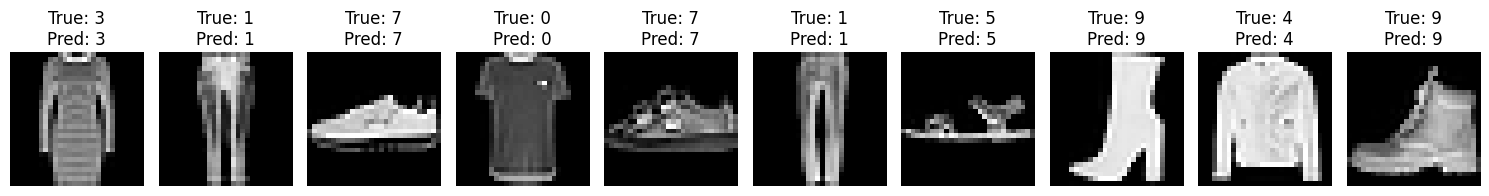

In [50]:
# Get predictions for the test dataset
predictions = model.predict(x_test)

# Convert predictions to class labels
predicted_classes = predictions.argmax(axis=1)  # For one-hot encoded output

# Choose random indices from the test set
num_samples = 10
indices = np.random.choice(len(x_test), num_samples, replace=False)

# Get the corresponding images, true labels, and predicted labels
sample_images = x_test[indices]
true_labels = y_test[indices]
predicted_labels = predicted_classes[indices]

# Plot the sample images
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)  # Create a row of subplots
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')  # Reshape if needed
    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Now we repeat the excercise with the second model.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


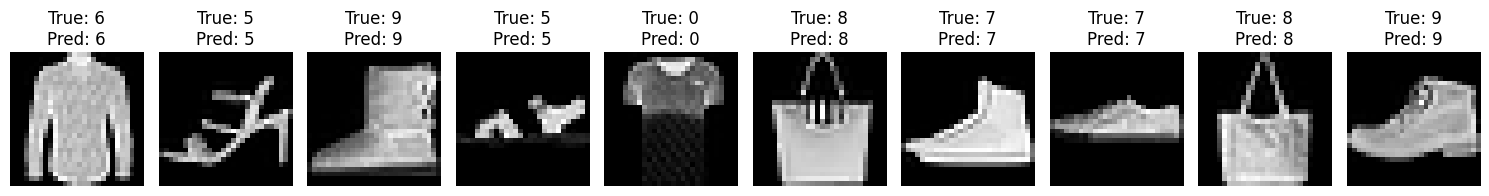

In [49]:
# Get predictions for the test dataset
predictions = model2.predict(x_test)

# Convert predictions to class labels
predicted_classes = predictions.argmax(axis=1)  # For one-hot encoded output

# Choose random indices from the test set
num_samples = 10
indices = np.random.choice(len(x_test), num_samples, replace=False)

# Get the corresponding images, true labels, and predicted labels
sample_images = x_test[indices]
true_labels = y_test[indices]
predicted_labels = predicted_classes[indices]

# Plot the sample images
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)  # Create a row of subplots
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')  # Reshape if needed
    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Overall we see that in both cases all the samples are classified correctly.